In [61]:
import nltk
import os,math,glob,re,copy,random

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,RegexpTokenizer,TweetTokenizer
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer

import re as regex
import numpy as np
from sklearn.externals import joblib
import contractions
from operator import itemgetter
from itertools import chain

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import gensim

from sklearn.metrics import confusion_matrix,accuracy_score,normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score,contingency_matrix

import matplotlib.pyplot as plt

In [2]:
# from my previous assignment
def contract(text):
    return contractions.fix(text)

def regTokenize(text):
#     tok=RegexpTokenizer('[A-Za-z0-9]*[.]?\w+')
    tok=RegexpTokenizer('[A-Za-z0-9]?\w+')
    return tok.tokenize(text) 

def lowercase(text):
    return text.lower()

def lemma(words):
    for i in range(0,len(words)):
        words[i]=WordNetLemmatizer().lemmatize(words[i])
    return words

def stemming(words):
    porter_stemmer=PorterStemmer()
    for i in range(0,len(words)):
        words[i]=porter_stemmer.stem(words[i])
    return words

def tweet(words):
    tok=TweetTokenizer()
    return tok.tokenize(words)

def comma(text):
    text = "".join(c for c in text if c not in ('!','.',':',',','"','?','(',')'))
    return text

def removestopwords(text):
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in text:
        if w not in stopWords:
            wordsFiltered.append(w)
    return wordsFiltered

In [3]:
# #some functions are from previous Assignment
# def getDocLength(docId):#getting len(document)=number of words in that document from metadata
#     return metadata.get(docId)

# def getWordFreqInBodyDoc(docId,word):#getting word frequency in doc in document
#     f=open(docId,'r+',errors='ignore')
#     data=f.read()
#     data=lowercase(data)
#     data=contract(data)
#     data=comma(data)
#     data=regTokenize(data)
#     data=lemma(data)
# #     data=stemming(data)
#     freq=data.count(word)
#     return freq

# def getQTermPosts(term):#getting postings of term from dictionary
#     return terms_dictionary_load.get(term)[1]

# def getTermDocFreq(t):
#     return terms_dictionary_load.get(t)[0]

# def getDocWords(docId):
#     f=open(docId,'r+',errors='ignore')
#     data=f.read()
#     data=lowercase(data)
#     data=contract(data)
#     data=comma(data)
#     data=regTokenize(data)
#     data=lemma(data)
# #     data=stemming(data)
#     return data

In [4]:
classes={'comp.graphics':0,'rec.sport.hockey':1,'sci.med':2,'sci.space':3,'talk.politics.misc':4}

#### Structures
#### terms=[words]
#### terms_dictionary={term :[#df,[filname1,filename2,...]]}   --> Inverted Index
#### metadata= [ [filename, #words],[..],.. ]

#### document_id=[filename1,..]

#### vsm=[ [tf-idf,..], [..], .. ] --> tf-idf vector for each document

In [5]:
# document_ids=[]
# # metadata=[]
# metadata={}
# terms=[]
# terms_dictionary={}

# path = 'q1_q2_dataset'
# print(path)
# for dire in glob.glob(os.path.join(path, '*')):
#     print(dire)
#     for filename in glob.glob(os.path.join(dire, '*')):
#         st=filename.split('\\')
#         s=path+'/'+st[1]+'/'+st[2]
# #         print(s)
#         docId=s
#         document_ids.append(docId)

#         f=open(filename,'r+')
#         data=f.read()

#         data=lowercase(data)
#         data=contract(data)
#         data=regTokenize(data)
#         data=lemma(data)
# #         data=stemming(data)

#         data=list(set(data))
        
#         temp=[]
#         temp.append(s)
#         temp.append(len(data))
# #         metadata.append(temp)
#         metadata[s]=len(data)
        
#         for t in data:
#             terms.append(t)
#             if(t not in terms_dictionary.keys()):
#                 terms_dictionary[t]=[]
#                 docfreq=1
#                 terms_dictionary[t].append(docfreq)
#                 docs=[docId]
#                 terms_dictionary[t].append(docs)
#             else:
#                 terms_dictionary.get(t)[1].append(docId)
#                 terms_dictionary.get(t)[0]=len(terms_dictionary.get(t)[1])
#     print('============================================================')

In [6]:
# terms=list(set(terms))

In [7]:
# for i in metadata:
#     print(i,' ',metadata.get(i))
#     break
# for i in terms:
#     print(i)
#     break

In [8]:
# vsm=[]

# n=len(document_ids)
# count=0
# for i in document_ids:
# #     print(i)
#     d_tf_idf=[]

#     doc_words=getDocWords(i)
#     doc_length=getDocLength(i)
#     for w in terms:
# #         print(w)
#         freq=doc_words.count(w)
#         tf=freq/doc_length

#         inner=n/terms_dictionary.get(w)[0]
#         idf=math.log(inner)
#         tf_idf=tf*idf
        
#         d_tf_idf.append(tf_idf)
#     vsm.append(d_tf_idf)
    
#     count+=1
#     print(count)

## dumping

In [9]:
# documentIds_fname='sav/1/document_ids_bow.sav'
# joblib.dump(document_ids,documentIds_fname)

# metadata_fname='sav/1/metadata_bow.sav'
# joblib.dump(metadata,metadata_fname)

# terms_fname='sav/1/terms_bow.sav'
# joblib.dump(terms,terms_fname)

# terms_dictionary_fname='sav/1/terms_dictionary_bow.sav'
# joblib.dump(terms_dictionary,terms_dictionary_fname)

# vsm_fname='sav/1/vsm_bow.sav'
# joblib.dump(vsm,vsm_fname)

### Loading

In [10]:
documentIds_fname='sav/1/document_ids_bow.sav'
document_ids= joblib.load(documentIds_fname)

metadata_fname='sav/1/metadata_bow.sav'
metadata=joblib.load(metadata_fname)

terms_fname='sav/1/terms_bow.sav'
terms=joblib.load(terms_fname)

terms_dictionary_fname='sav/1/terms_dictionary_bow.sav'
terms_dictionary=joblib.load(terms_dictionary_fname)

# vsm_fname='sav/1/vsm_bow.sav'
# vsm=joblib.load(vsm_fname)

print(len(document_ids),len(metadata),len(terms),len(terms_dictionary))

5000 5000 65309 65309


In [11]:
# document_ids

In [12]:
path = 'q1_q2_dataset'
print(path)

docs_with_words=[]
for dire in glob.glob(os.path.join(path, '*')):
    print(dire)
    for filename in glob.glob(os.path.join(dire, '*')):
        
        words=[]
        
        st=filename.split('\\')
        s=path+'/'+st[1]+'/'+st[2]
#         print(s)
        docId=s

        f=open(filename,'r+')
        data=f.read()

        data=lowercase(data)
        data=contract(data)
        data=regTokenize(data)
        data=lemma(data)
#         data=stemming(data)

        data=list(set(data))
        
        docs_with_words.append(data)

    print('============================================================')

q1_q2_dataset
q1_q2_dataset\comp.graphics
q1_q2_dataset\rec.sport.hockey
q1_q2_dataset\sci.med
q1_q2_dataset\sci.space
q1_q2_dataset\talk.politics.misc


In [13]:
len(docs_with_words)

5000

### dumping docs_with_words

In [14]:
docs_with_words_filename='sav/2/docs_with_words.sav'
joblib.dump(docs_with_words,docs_with_words_filename)

['sav/2/docs_with_words.sav']

### Loading docs_with_words

In [15]:
docs_with_words_filename='sav/2/docs_with_words.sav'
docs_with_words = joblib.load(docs_with_words_filename)
print(len(docs_with_words))

5000


### Loading Word2Vec pre-trained model

In [16]:
w2v_model = gensim.models.KeyedVectors.load_word2vec_format('C:/Users/Subhani/Documents/Jupyter IR/Assignment_5/GoogleNews-vectors-negative300.bin.gz', binary=True) 

## Avg Word2Vec

In [17]:
avg_w2v= []
avg_w2v_dictionary={}
count=0
k=0

for document in docs_with_words:
    
    count=count+1
    residual_vector = np.zeros(300)
    count_words=0
    for word in document:
        try:
            vec = w2v_model.wv[word]
            residual_vector += vec
            count_words += 1
        except:
            pass
    residual_vector /= count_words
    avg_w2v.append(residual_vector)
    
    avg_w2v_dictionary[document_ids[k]]=residual_vector
    k+=1
print(len(avg_w2v))
print(len(avg_w2v[2]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]


5000
300


## Tf-Idf Word2Vec

In [18]:
tf_idf_w2v= []
tf_idf_w2v_dictionary={}
k=0

count=0
total_docs=5000
for document in docs_with_words:
    count=count+1
    residual_vec = np.zeros(300)
    weight_sum=0
    for word in document:
        tf = (document.count(word)) / len(document)
        idf = math.log(total_docs/terms_dictionary.get(word)[0])
        tf_idf = tf*idf
        try:
            vec = w2v_model.wv[word]
            #get tfidf of each word
            residual_vec += (vec*tf_idf)
            weight_sum += tf_idf
        except:
            pass
    residual_vec /= weight_sum
    tf_idf_w2v.append(residual_vec)
    
    tf_idf_w2v_dictionary[document_ids[k]]=residual_vec
    k+=1
print(len(tf_idf_w2v))
print(len(tf_idf_w2v[2]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()


5000
300


In [19]:
print(len(avg_w2v_dictionary),len(tf_idf_w2v_dictionary))

5000 5000


In [20]:
document_ids[0]

'q1_q2_dataset/comp.graphics/37261'

### dumping 'avg_w2v' and 'tf_idf_w2v'

In [21]:
len(avg_w2v_dictionary.get('q1_q2_dataset/comp.graphics/37261'))

300

In [22]:
avg_w2v_filename='sav/2/avg_w2v.sav'
joblib.dump(avg_w2v, avg_w2v_filename)

tf_idf_w2v_filename='sav/2/tf_idf_w2v.sav'
joblib.dump(tf_idf_w2v, tf_idf_w2v_filename)

avg_w2v_dictionary_filename='sav/2/avg_w2v_dictionary.sav'
joblib.dump(avg_w2v_dictionary,avg_w2v_dictionary_filename)

tf_idf_w2v_dictionary_filename='sav/2/tf_idf_w2v_dictionary.sav'
joblib.dump(tf_idf_w2v_dictionary, tf_idf_w2v_dictionary_filename)

['sav/2/tf_idf_w2v_dictionary.sav']

### Loading 'avg_w2v' and 'tf_idf_w2v'

In [23]:
avg_w2v_filename='sav/2/avg_w2v.sav'
avg_w2v = joblib.load(avg_w2v_filename)

tf_idf_w2v_filename='sav/2/tf_idf_w2v.sav'
tf_idf_w2v = joblib.load(tf_idf_w2v_filename)

avg_w2v_dictionary_filename='sav/2/avg_w2v_dictionary.sav'
avg_w2v_dictionary = joblib.load(avg_w2v_dictionary_filename)

tf_idf_w2v_dictionary_filename='sav/2/tf_idf_w2v_dictionary.sav'
tf_idf_w2v_dictionary = joblib.load(tf_idf_w2v_dictionary_filename)


### Evaluation Metrics

## K-means methods

In [32]:
X_class_filename='sav/2/X_class.sav'
X_class = joblib.load(X_class_filename)

y_class_filename='sav/2/y_class'
y_class = joblib.load(y_class_filename)

In [24]:
def ecul_dist(x,y):
    sub=np.subtract(x,y)
    square = sub**2
    summ = np.sum(square)
    sqrt = math.sqrt(summ)
    return sqrt

def mean(args):
    meann=[]
    for cluster in args:
        if(len(cluster)==0):
            meann.append(0)
            continue
        meann.append(np.mean(cluster,axis=0))
    return meann  

In [73]:
def k_means(dataset_w2v , no_of_clusters, maxItr):
    dist=[]
    clusters=[[],[],[],[],[]]

    seed=random.sample(dataset_w2v , no_of_clusters)

    purity_plot=[]
    ari_plot=[]
    nmi_plot=[]
    rss_plot=[]
    
    count=0
    predicted_cluster=[]
    for i in range(maxItr):
        print('-------------------------------------------------')
        rss=0
        print('Iteration:',i)
        for j in dataset_w2v:
            for k in seed:
                dist.append(ecul_dist(k,j))
            min_dist=np.argmin(dist)
            
            rss+=dist[min_dist]
            
            dist=[]
            clusters[min_dist].append(j)
            
            predicted_cluster.append(min_dist) ##

        seed1= seed
        seed= mean(clusters)

        if (np.array_equal(seed,seed1)):
            print('Updated Centroid')
            print("convergence reached!!")
            break

        for p in clusters:
            if(len(p)==0 and i==0):
                print("Invalid Seed Initialization!!")
                print("Changing the seed by randomly picking from data set")
                maxItr=maxItr+1
                count=0
                seed=random.sample(dataset_w2v,no_of_clusters)
                break

        for l in range(no_of_clusters):
            print(len(clusters[l]),' ', end='')
            
        
        
        cont_matrix= contingency_matrix(y_class, predicted_cluster)
        purity=np.sum(np.amax(cont_matrix,axis=0)) / np.sum(cont_matrix)
        
        ari=adjusted_rand_score(predicted_cluster, y_class)
        nmi=normalized_mutual_info_score(y_class, predicted_cluster)
        
        purity_plot.append(purity)
        ari_plot.append(ari)
        rss_plot.append(rss)
        nmi_plot.append(nmi)
        
        print('\n\nPurity:', purity, '\t\t\t|\tARI:', ari , '\nRSS:', rss, '\t|\tNMI:', nmi)        
        
        if(i != (maxItr-1)):
            clusters=[]
            predicted_cluster=[]
            for l in range(no_of_clusters):
                clusters.append([])
            
        count=count+1
        
    return purity_plot, ari_plot, rss_plot, nmi_plot, clusters

### K_Means avg_w2v

In [74]:
no_of_clusters=5
maxItr=50
purity_plot, ari_plot, rss_plot, nmi_plot, clusters = k_means(avg_w2v, no_of_clusters, maxItr)

-------------------------------------------------
Iteration: 0
633  109  1682  2110  466  

Purity: 0.3274 			|	ARI: 0.06505532059048769 
RSS: 1739.2932648529488 	|	NMI: 0.08873360766488585
-------------------------------------------------
Iteration: 1
927

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


  148  1466  1785  674  

Purity: 0.3366 			|	ARI: 0.059886787059037654 
RSS: 1269.2532287514268 	|	NMI: 0.0838799686809283
-------------------------------------------------
Iteration: 2
1007  151  1490  1621  731  

Purity: 0.3588 			|	ARI: 0.07433539303756419 
RSS: 1255.9449610088564 	|	NMI: 0.10258568132962816
-------------------------------------------------
Iteration: 3
1070  143  1538  1459  790  

Purity: 0.3802 			|	ARI: 0.09350725131905827 
RSS: 1250.8358283584287 	|	NMI: 0.1275284447646121
-------------------------------------------------
Iteration: 4
1125  135  1536  1358  846  

Purity: 0.3948 			|	ARI: 0.11125925740775597 
RSS: 1247.685408308239 	|	NMI: 0.15016267976868453
-------------------------------------------------
Iteration: 5
1185  132  1548  1254  881  

Purity: 0.4102 			|	ARI: 0.129104503826694 
RSS: 1245.5249437969094 	|	NMI: 0.17306430359873648
-------------------------------------------------
Iteration: 6
1247  127  1558  1154  914  

Purity: 0.42 			|	ARI: 

### K_means tf_idf_w2v

In [75]:
no_of_clusters=5
maxItr=50
purity_plot, ari_plot, rss_plot, nmi_plot, clusters = k_means(tf_idf_w2v, no_of_clusters, maxItr)

-------------------------------------------------
Iteration: 0
857  1  104  658  3380  

Purity: 0.3774 			|	ARI: 0.08240995253500732 
RSS: 2613.5729463913667 	|	NMI: 0.17136988132467526
-------------------------------------------------
Iteration: 1
1025  1  334  1422  2218  

Purity: 0.4804 			|	ARI: 0.23463442644305507 
RSS: 2130.8181736534843 	|	NMI: 0.29677706809438353
-------------------------------------------------
Iteration: 2
1051  1  447  1708  1793  

Purity: 0.4814 			|	ARI: 0.2543978885495092 
RSS: 2093.641703025297 	|	NMI: 0.30817729426349644
-------------------------------------------------
Iteration: 3
1078  1  523  1812  1586  

Purity: 0.4808 			|	ARI: 0.2575943494457123 
RSS: 2089.8716390865743 	|	NMI: 0.30585430658450186
-------------------------------------------------
Iteration: 4
1101  1  586  1827  1485  

Purity: 0.4808 			|	ARI: 0.26041606046265986 
RSS: 2088.5683544496583 	|	NMI: 0.3060203821797116
-------------------------------------------------
Iteration: 

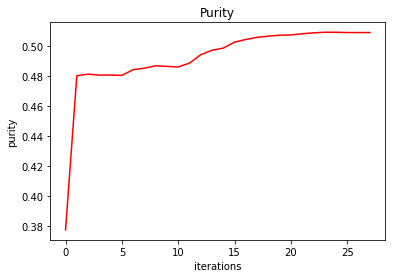

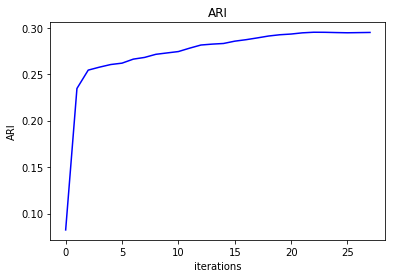

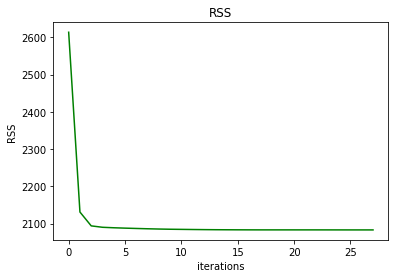

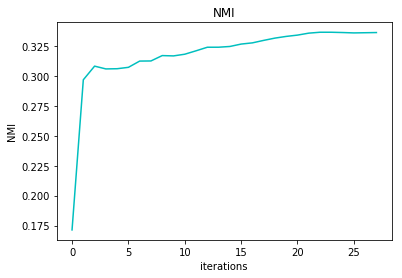

In [81]:
plt.title('Purity')
plt.plot(range(len(purity_plot)), purity_plot,color='r')
plt.xlabel('iterations')
plt.ylabel('purity')
plt.show()

plt.title('ARI')
plt.plot(range(len(ari_plot)), ari_plot,color='b')
plt.xlabel('iterations')
plt.ylabel('ARI')
plt.show()

plt.title('RSS')
plt.plot(range(len(rss_plot)), rss_plot,color='g')
plt.xlabel('iterations')
plt.ylabel('RSS')
plt.show()

plt.title('NMI')
plt.plot(range(len(nmi_plot)), nmi_plot,color='c')
plt.xlabel('iterations')
plt.ylabel('NMI')
plt.show()

In [83]:
# plt.title('Metrics')
# plt.plot(range(len(purity_plot)), purity_plot,color='r')
# plt.plot(range(len(ari_plot)), ari_plot,color='b')
# plt.plot(range(len(rss_plot)), rss_plot,color='g')
# plt.plot(range(len(nmi_plot)), nmi_plot,color='c')
# plt.ylabel('Metric')
# plt.xlabel('iterations')
# plt.show()